In [277]:
import pandas as pd
import numpy as np
import operations as op
import cobra
from matplotlib import pyplot as plt

import sys
import os

In [307]:
ecpy_path = '../../../ecpy/'
sys.path.append(os.path.abspath(ecpy_path))
import utils
import ecpy

In [310]:
import importlib
importlib.reload(utils)
importlib.reload(ecpy)

<module 'ecpy' from '/Users/gangl/Documents/GitHub/Halo-GEM/ecpy/ecpy.py'>

#### 1. Only use  those kcats from bacteria

In [280]:
kcat_file = '../../../../GECKO/databases/max_KCAT.txt'
dfkcat = pd.read_csv(kcat_file,sep='\t',header=None)
dfkcat.columns = ['ec','substrate','species','kcat','comments']
print(dfkcat.shape)

(30162, 5)


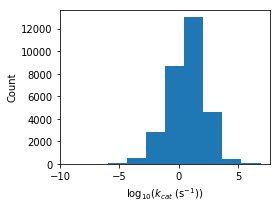

In [281]:
utils.plot_kcat_dist(dfkcat)

In [282]:
sel_ind = [ind for ind in dfkcat.index if 'bacteria' in dfkcat.loc[ind,'species']]
print(len(sel_ind))

10284


In [283]:
dfkcat = dfkcat.loc[sel_ind,:]

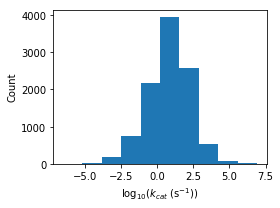

In [284]:
utils.plot_kcat_dist(dfkcat)

#### 2. match

In [285]:
model_file = '../../../ModelFiles/json/Halo_GEM_v1.json'
model = cobra.io.load_json_model(model_file)

In [286]:
irrModel = ecpy.convertToIrrev(model)

In [287]:
rxn_kcats, case_count = ecpy.match_kcats(irrModel,dfkcat)

1734 / 2325 have been assigned with at least one ec number
           ec                substrate  \
9   EC1.1.1.1        (s)-(+)-1-indanol   
10  EC1.1.1.1    (s)-(+)-alpha-tetraol   
11  EC1.1.1.1  (s)-(-)-1-phenylethanol   
13  EC1.1.1.1            (s)-1-indanol   
14  EC1.1.1.1      (s)-1-phenylethanol   

                                              species  kcat comments  
9   thermus thermophilus//prokaryotes;bacteria;dei...  61.4        *  
10  thermus thermophilus//prokaryotes;bacteria;dei...  57.0        *  
11  thermus thermophilus//prokaryotes;bacteria;dei...   1.1        *  
13  thermus thermophilus//prokaryotes;bacteria;dei...  61.4        *  
14  thermus thermophilus//prokaryotes;bacteria;dei...   1.1        *  
Searching with 0 wildcard(s)


/Users/gangl/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472 PerformanceWarning: indexing past lexsort depth may impact performance.


Number of kcats found so far: 1013 

           ec                substrate  \
9   EC1.1.1.X        (s)-(+)-1-indanol   
10  EC1.1.1.X    (s)-(+)-alpha-tetraol   
11  EC1.1.1.X  (s)-(-)-1-phenylethanol   
13  EC1.1.1.X            (s)-1-indanol   
14  EC1.1.1.X      (s)-1-phenylethanol   

                                              species  kcat comments  
9   thermus thermophilus//prokaryotes;bacteria;dei...  61.4        *  
10  thermus thermophilus//prokaryotes;bacteria;dei...  57.0        *  
11  thermus thermophilus//prokaryotes;bacteria;dei...   1.1        *  
13  thermus thermophilus//prokaryotes;bacteria;dei...  61.4        *  
14  thermus thermophilus//prokaryotes;bacteria;dei...   1.1        *  
Searching with 1 wildcard(s)
Number of kcats found so far: 1666 

           ec                substrate  \
9   EC1.1.X.X        (s)-(+)-1-indanol   
10  EC1.1.X.X    (s)-(+)-alpha-tetraol   
11  EC1.1.X.X  (s)-(-)-1-phenylethanol   
13  EC1.1.X.X            (s)-1-indanol   
14  EC1.

In [299]:
df_model_kcat = pd.DataFrame()
for rxn_id,kcats in rxn_kcats.items():
    mean_log10_kcat = np.mean(np.log10(kcats))
    if len(kcats)>1: std_log10_kcat = np.mean(np.log10(kcats))
    else: std_log10_kcat = 1 #introduce a variance of 1 magnitude
    
    df_model_kcat.loc[rxn_id,'log10_kcat_mean'] = mean_log10_kcat
    df_model_kcat.loc[rxn_id,'log10_kcat_std'] = std_log10_kcat
        
        
print(df_model_kcat.shape)
df_model_kcat.head(n=10)

(1734, 2)


,log10_kcat_mean,log10_kcat_std
CHOLD,1.026202,1.026202
DEOXYRIBOSE-P-ALD-RXN,1.108909,1.108909
RXN-6321,1.223489,1.223489
GLYOHMETRANS-RXN,1.435783,1.435783
GLYOHMETRANS-RXN_REV,0.698970,1.000000
THREONINE-ALDOLASE-RXN,0.271842,1.000000
RXN0-1461,-2.522879,1.000000
GLUTATHIONE-REDUCT-NADPH-RXN,2.069349,2.069349
GLUTATHIONE-REDUCT-NADPH-RXN_REV,2.017161,2.017161
RXN0-2382,0.861223,0.861223


In [303]:
df_model_kcat.to_csv('../Results/mapped_kcats.csv')

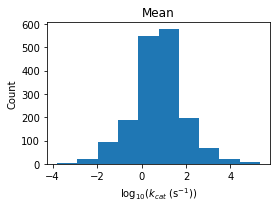

In [311]:
utils.plot_kcat_dist(df_model_kcat,'log10_kcat_mean','Mean',True)

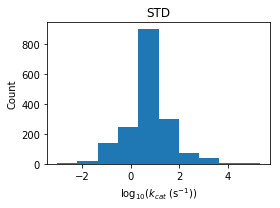

In [312]:
utils.plot_kcat_dist(df_model_kcat,'log10_kcat_std','STD',True)

In [306]:
case_count

{'0_0': 540,
 '0_1': 473,
 '1_0': 244,
 '1_1': 409,
 '2_0': 4,
 '2_1': 5,
 '3_1': 2,
 '4_1': 1,
 '4_0': 56}